In [70]:
import warnings
warnings.simplefilter("ignore")

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

In [73]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [74]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, roc_auc_score

In [75]:
import shap

# 1. Load data

In [76]:
df = pd.read_csv(r"dataset/App_Interaction_Dataset.csv")

In [77]:
df.sample(5)

,pages_visited,clicks,features_explored,signup_flag,signup_offer_used,referral_flag,video_views,forms_completed,likes_given,search_queries,scroll_depth,time_of_day,device_type,age,income,location,customer_id
43202,-0.089849,1.210823,0.571476,0,3.257416,0.857385,-0.597545,1.799027,3.238541,0.714855,0.301483,morning,desktop,20.653687,36618.821330,rural,43203
81421,-3.153947,-1.955550,-3.966882,0,-2.377462,-1.739427,0.127014,-0.046732,-5.992985,1.453914,3.190523,morning,desktop,42.258829,56098.555026,urban,81422
55016,-2.140814,-0.664198,-1.008115,0,2.398615,-0.372728,2.194166,-1.173077,-5.030016,-1.368806,-1.399305,morning,mobile,27.928752,74257.681059,rural,55017
25530,-2.401153,4.536822,-3.135444,0,-1.755181,2.165963,2.137854,3.388904,-3.766059,0.572490,0.493691,evening,desktop,43.902363,61410.729221,rural,25531
48207,3.939393,-3.508712,-1.862065,0,1.083985,2.091236,-0.520880,0.232442,3.382415,7.098397,0.338434,evening,desktop,43.633884,63073.090638,rural,48208


In [78]:
df.shape

(100000, 17)

# 2. Check data quality

data type

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pages_visited      100000 non-null  float64
 1   clicks             100000 non-null  float64
 2   features_explored  100000 non-null  float64
 3   signup_flag        100000 non-null  int64  
 4   signup_offer_used  100000 non-null  float64
 5   referral_flag      100000 non-null  float64
 6   video_views        100000 non-null  float64
 7   forms_completed    100000 non-null  float64
 8   likes_given        100000 non-null  float64
 9   search_queries     100000 non-null  float64
 10  scroll_depth       100000 non-null  float64
 11  time_of_day        100000 non-null  object 
 12  device_type        100000 non-null  object 
 13  age                100000 non-null  float64
 14  income             100000 non-null  float64
 15  location           100000 non-null  object 
 16  cus

unique value

In [80]:
df.shape

(100000, 17)

In [81]:
for i in df.columns:
    print('Columns name: ', i)
    print('Unique value: ', df[i].unique())
    print('Count unique value: ', df[i].nunique())
    print('-'*10)

Columns name:  pages_visited
Unique value:  [-1.46073541 -3.42175049 -5.7128025  ... -2.13262029  1.35412795
  1.32394831]
Count unique value:  100000
----------
Columns name:  clicks
Unique value:  [-3.24531097 -0.93411422 -0.44266983 ... -1.49393298 -0.98578911
 -3.47218875]
Count unique value:  100000
----------
Columns name:  features_explored
Unique value:  [-0.64607032 -4.57928003 -4.36318962 ... -0.68597123 -4.57461636
 -2.02900796]
Count unique value:  100000
----------
Columns name:  signup_flag
Unique value:  [0 1]
Count unique value:  2
----------
Columns name:  signup_offer_used
Unique value:  [ 2.12586057  1.20158304 -1.48888363 ...  0.83671036 -2.52935424
 -0.14446361]
Count unique value:  100000
----------
Columns name:  referral_flag
Unique value:  [-4.83899284 -0.99593771 -0.09049585 ... -1.45576895 -2.56587705
 -0.96241825]
Count unique value:  100000
----------
Columns name:  video_views
Unique value:  [ 1.88643928 -0.60340817  0.11107298 ... -0.71062319  0.09577465


missing value

In [82]:
df.isna().sum()

pages_visited        0
clicks               0
features_explored    0
signup_flag          0
signup_offer_used    0
referral_flag        0
video_views          0
forms_completed      0
likes_given          0
search_queries       0
scroll_depth         0
time_of_day          0
device_type          0
age                  0
income               0
location             0
customer_id          0
dtype: int64

# 3. Exploratory data analysis (EDA)

list of columns by types

In [83]:
id_col = ['customer_id']

In [84]:
target_col = ['signup_flag']

In [85]:
cat_col = [
    "time_of_day",
    "device_type",
    "location"
]

In [86]:
num_col = [
    "pages_visited",
    "clicks",
    "features_explored",
    "signup_offer_used",
    "referral_flag",
    "video_views",
    "forms_completed",
    "likes_given",
    "search_queries",
    "scroll_depth",
    "age",
    "income"
]

target

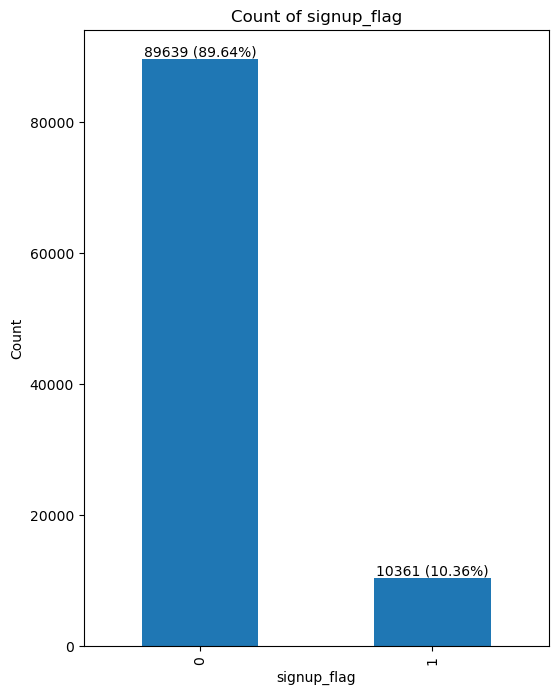

In [87]:
for column in target_col:
    category_counts = df[column].value_counts()
    total_count = len(df[column])
    plt.figure(figsize=(6, 8))
    ax = category_counts.plot(kind='bar')
    for i, count in enumerate(category_counts):
        percentage = (count / total_count) * 100
        ax.annotate(f'{count} ({percentage:.2f}%)', xy=(i, count), ha='center', va='bottom')
    
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Count of {column}')
    plt.show()

categorical features

In [88]:
df[cat_col].describe(include='object')

,time_of_day,device_type,location
count,100000,100000,100000
unique,4,3,3
top,afternoon,mobile,suburban
freq,25164,33481,33452


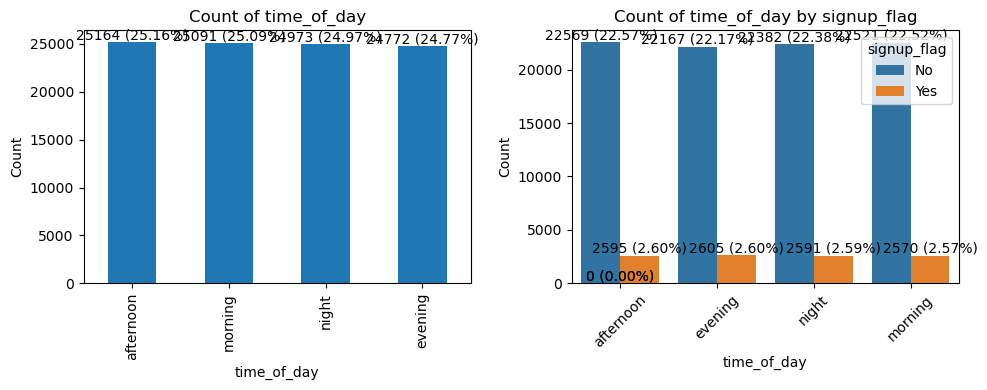

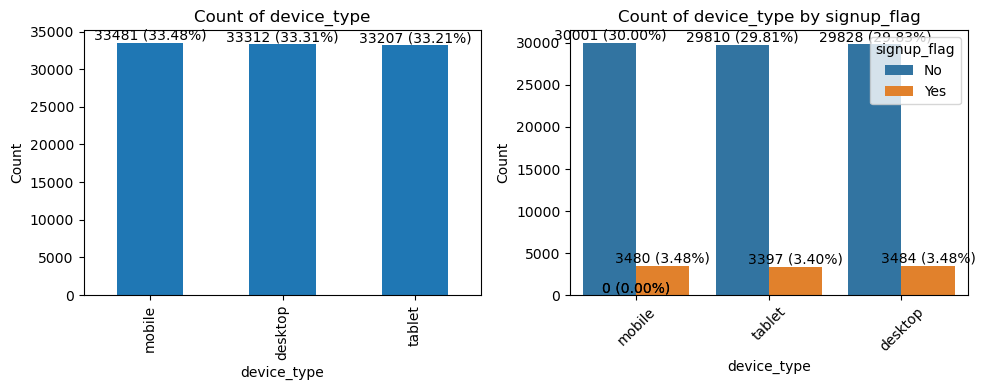

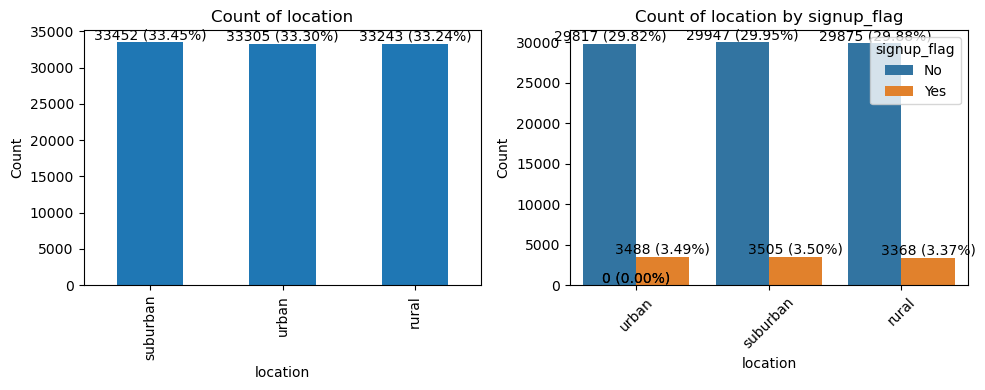

In [89]:
for column in cat_col:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Left subplot - Bar chart
    category_counts = df[column].value_counts()
    total_count = len(df[column])
    ax = category_counts.plot(kind='bar', ax=axes[0])
    for i, count in enumerate(category_counts):
        percentage = (count / total_count) * 100
        ax.annotate(f'{count} ({percentage:.2f}%)', xy=(i, count), ha='center', va='bottom')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Count')
    axes[0].set_title(f'Count of {column}')
    
    # Right subplot - Count plot with hue='signup_flag' and percentages
    sns.countplot(data=df, x=column, hue='signup_flag', ax=axes[1])
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Count')
    axes[1].set_title(f'Count of {column} by signup_flag')
    axes[1].legend(title='signup_flag', loc='upper right', labels=['No', 'Yes'])
    axes[1].tick_params(axis='x', rotation=45)
    
    # Annotate bars with percentages in the right subplot
    for bar in axes[1].patches:
        total_height = bar.get_height()
        percentage = (total_height / total_count) * 100
        text_x = bar.get_x() + bar.get_width() / 2
        text_y = total_height
        axes[1].annotate(f'{int(total_height)} ({percentage:.2f}%)',
                         (text_x, text_y),
                         ha='center',
                         va='bottom')

    plt.tight_layout()
    plt.show()

numerical features

In [90]:
df[num_col].describe()

,pages_visited,clicks,features_explored,signup_offer_used,referral_flag,video_views,forms_completed,likes_given,search_queries,scroll_depth,age,income
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.000343,0.099941,-0.889872,0.809126,-0.887838,-0.004301,0.006956,0.380210,0.096712,0.004399,34.994839,49951.422426
std,2.125379,2.075620,1.871200,1.933043,1.852264,1.003066,1.803724,3.979188,2.159139,1.963741,10.011507,14950.146229
min,-8.504090,-7.734528,-10.455627,-8.770045,-9.892028,-4.644419,-7.352355,-18.305390,-9.108645,-9.503710,-9.052697,-11734.000653
25%,-1.461219,-1.331814,-2.120503,-0.459890,-2.128885,-0.681269,-1.220146,-2.320585,-1.372364,-1.267435,28.220044,39837.578799
50%,-0.024329,0.088527,-0.897608,0.829999,-0.876828,-0.004006,0.055047,0.459048,0.101616,0.134470,34.938958,49951.744565
75%,1.427236,1.516625,0.315227,2.116313,0.367037,0.677136,1.260708,3.026456,1.573341,1.382033,41.748801,60079.573487
max,9.234621,8.762516,7.274042,8.233627,7.914092,4.595828,10.940767,18.050625,9.353481,7.345791,75.318283,108964.727684


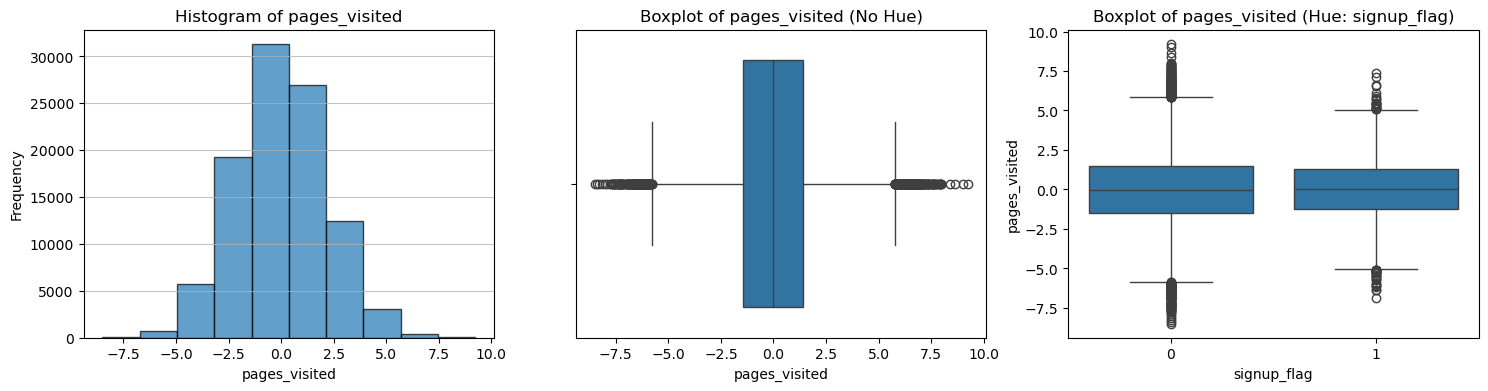

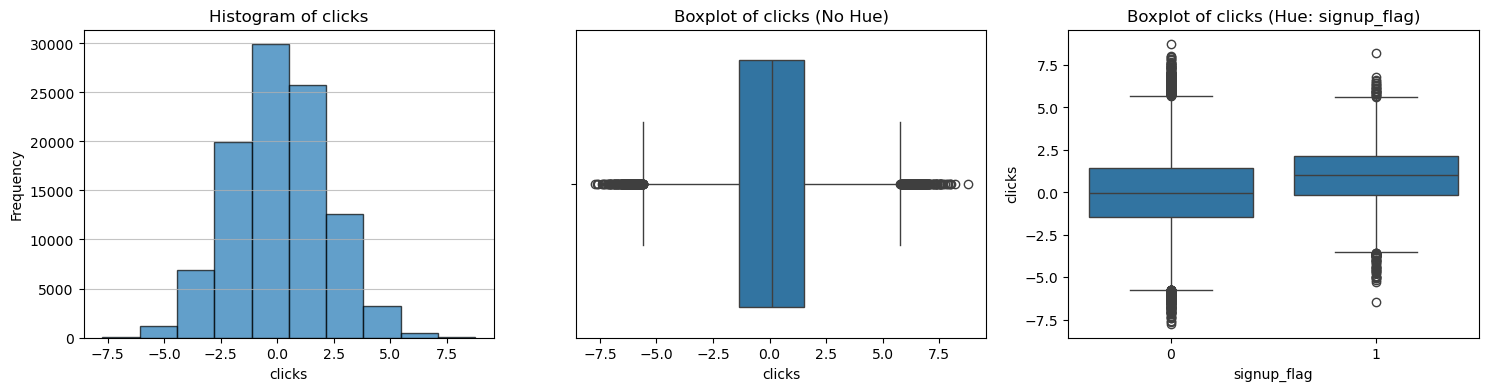

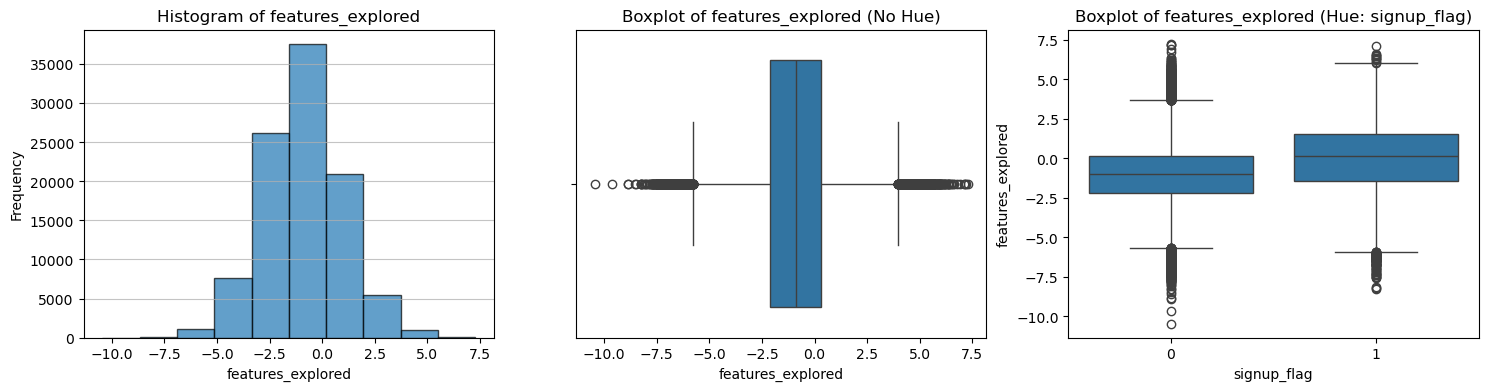

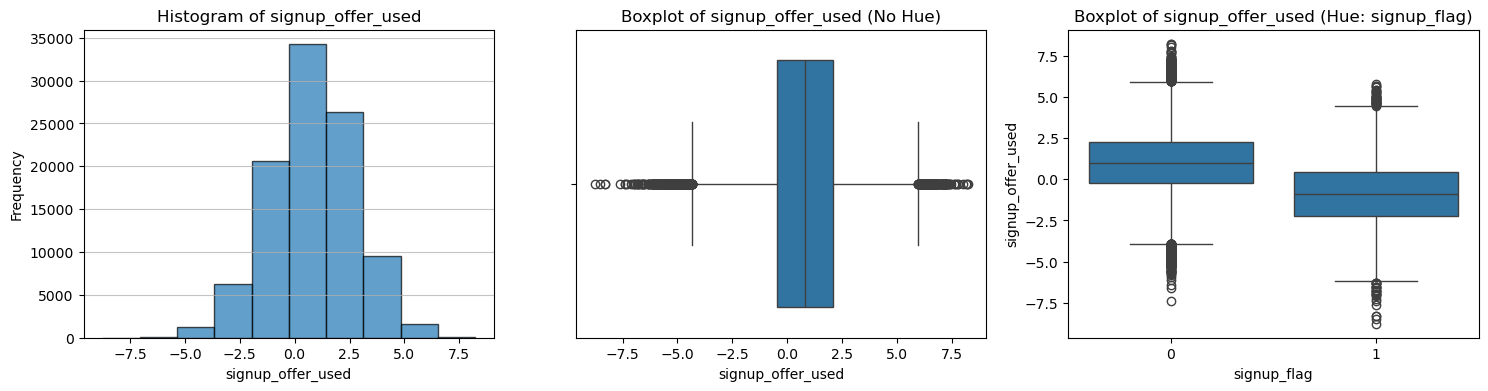

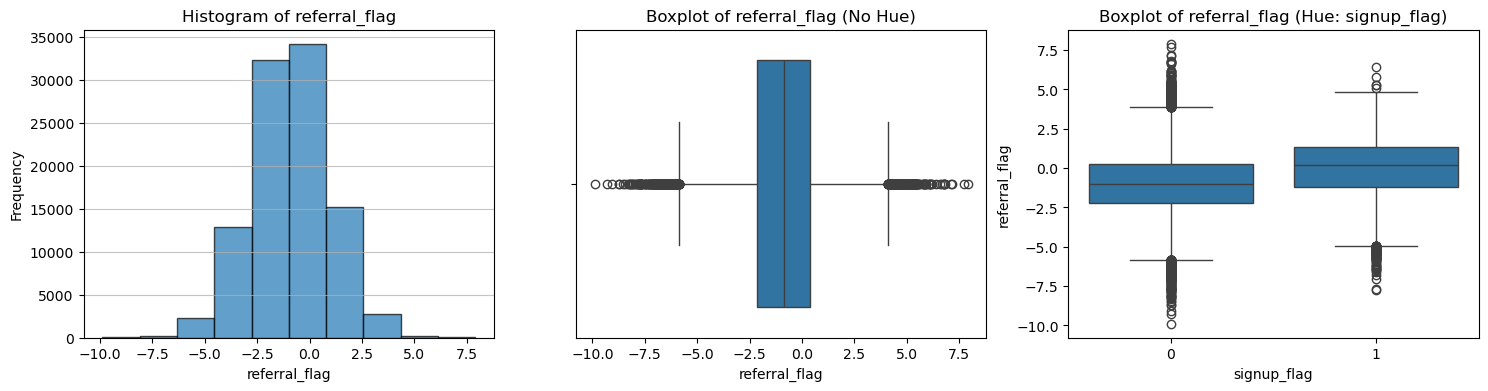

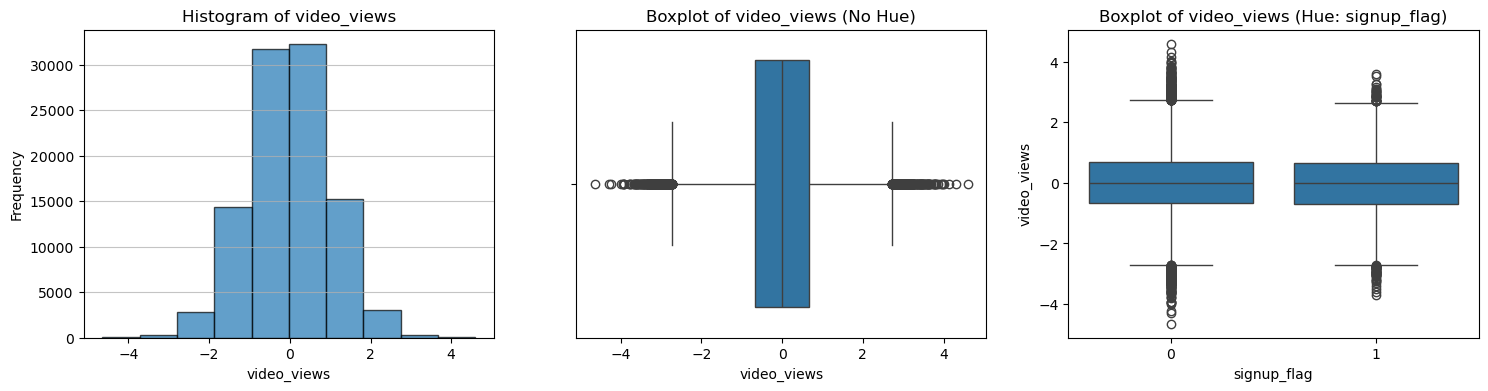

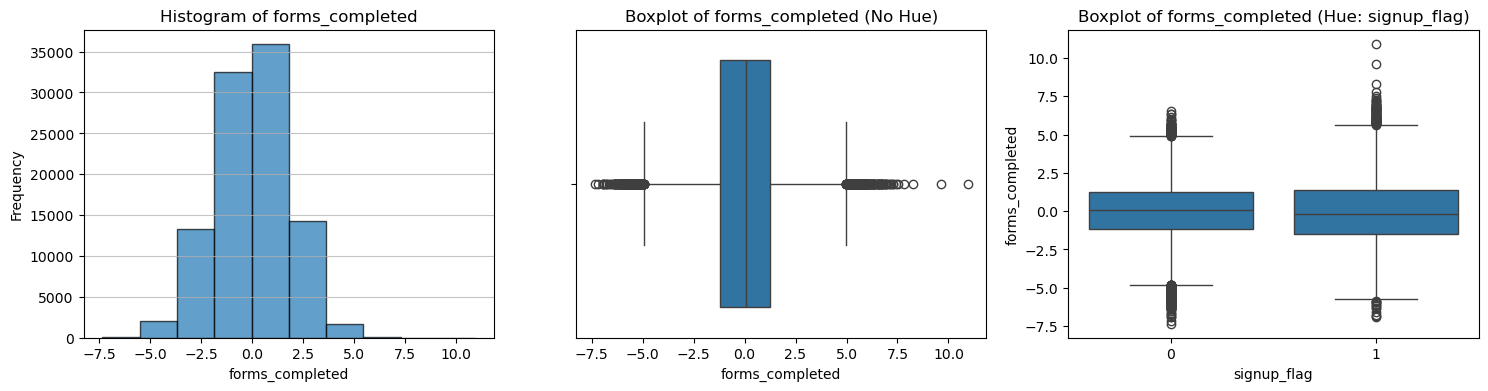

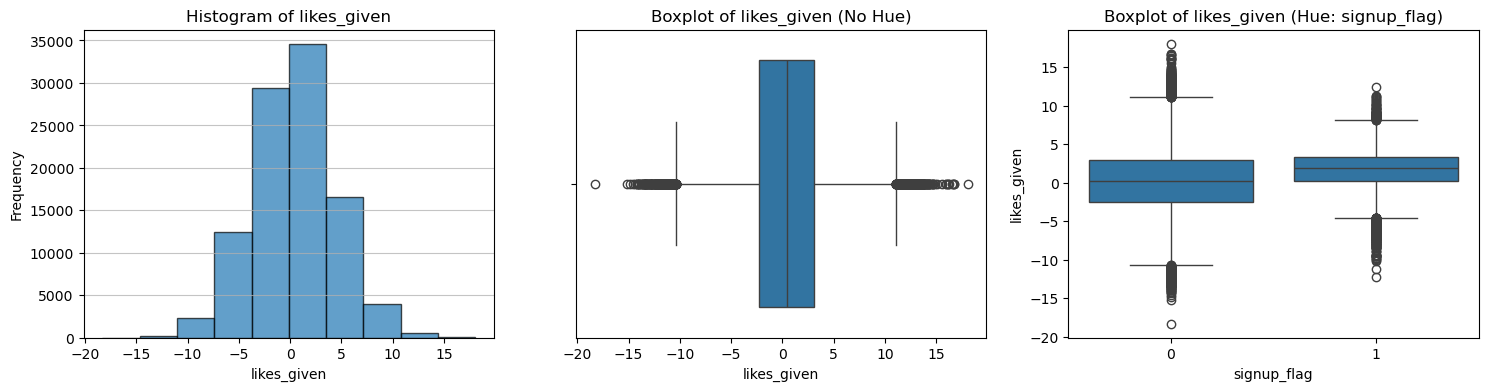

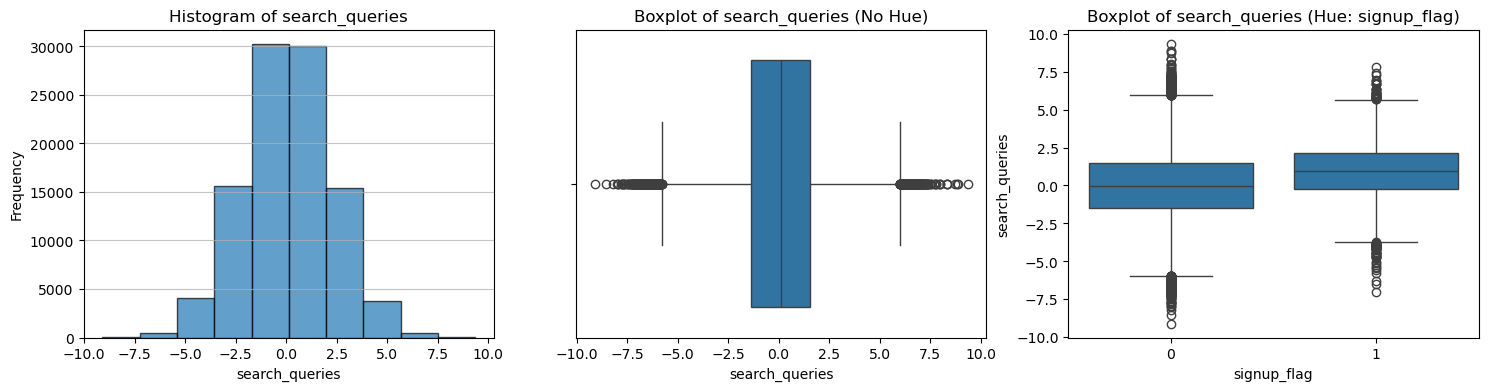

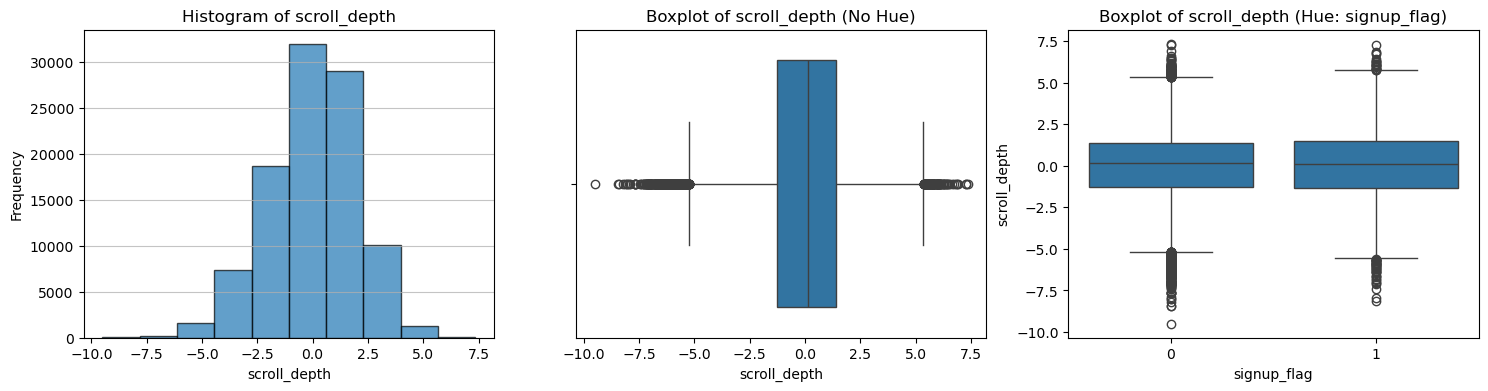

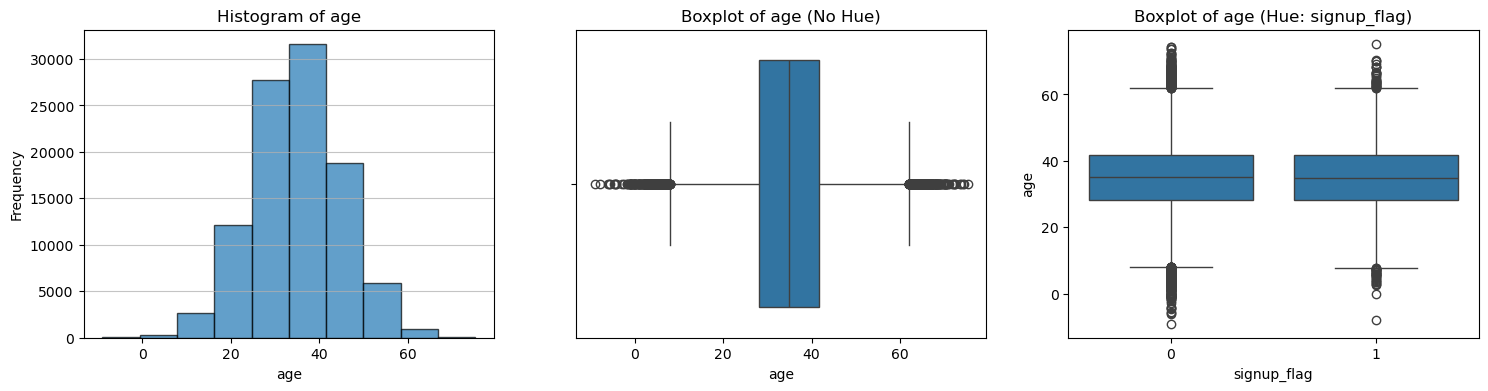

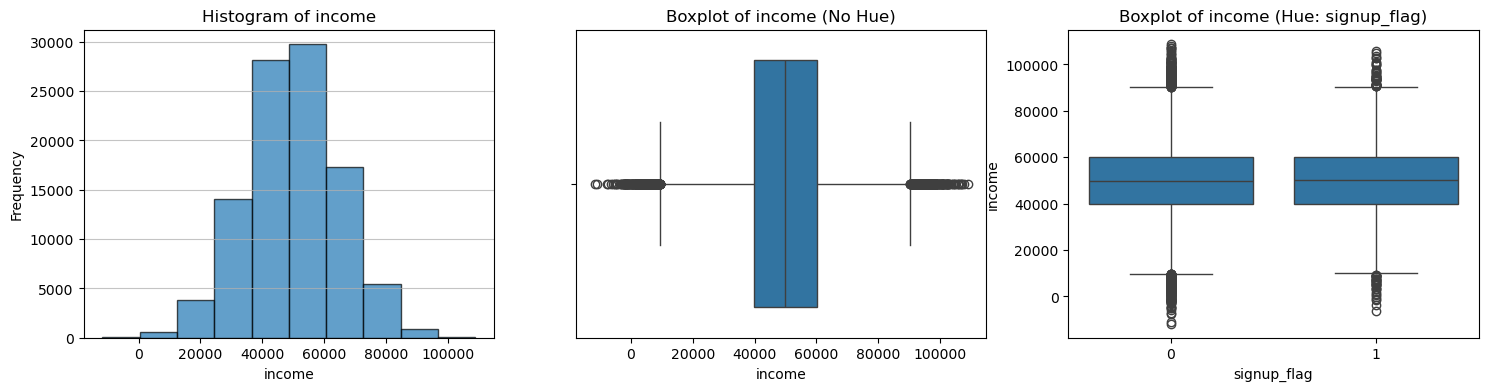

In [91]:
for column_name in num_col:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
    
    # Create a histogram
    ax1.hist(df[column_name], bins=10, edgecolor='black', alpha=0.7)
    ax1.set_title(f'Histogram of {column_name}')
    ax1.set_xlabel(column_name)
    ax1.set_ylabel('Frequency')
    ax1.grid(axis='y', alpha=0.75)
    
    # Create a boxplot without hue
    sns.boxplot(x=df[column_name], ax=ax2)
    ax2.set_title(f'Boxplot of {column_name} (No Hue)')
    ax2.set_xlabel(column_name)
    
    # Create a boxplot with hue='signup_flag'
    sns.boxplot(x='signup_flag', y=column_name, data=df, ax=ax3)
    ax3.set_title(f'Boxplot of {column_name} (Hue: signup_flag)')
    ax3.set_xlabel('signup_flag')
    ax3.set_ylabel(column_name)
    
    plt.show()

# 4. Feature engineering

time_of_day

In [92]:
duckdb.query('select distinct time_of_day from df')

┌─────────────┐
│ time_of_day │
│   varchar   │
├─────────────┤
│ afternoon   │
│ night       │
│ morning     │
│ evening     │
└─────────────┘

In [93]:
df = duckdb.query("""
select *
, case when time_of_day = 'morning' then 1 else 0 end time_morning
, case when time_of_day = 'afternoon' then 1 else 0 end time_afternoon
, case when time_of_day = 'evening' then 1 else 0 end time_evening
, case when time_of_day = 'night' then 1 else 0 end time_night
from df
""").to_df()

location

In [94]:
duckdb.query('select distinct location from df')

┌──────────┐
│ location │
│ varchar  │
├──────────┤
│ suburban │
│ urban    │
│ rural    │
└──────────┘

In [95]:
df = duckdb.query("""
select *
, case when location = 'urban' then 1 else 0 end location_urban
, case when location = 'suburban' then 1 else 0 end location_suburban
, case when location = 'rural' then 1 else 0 end location_rural
from df
""").to_df()

device_type

In [96]:
duckdb.query('select distinct device_type from df')

┌─────────────┐
│ device_type │
│   varchar   │
├─────────────┤
│ mobile      │
│ tablet      │
│ desktop     │
└─────────────┘

In [97]:
df = duckdb.query("""
select *
, case when device_type = 'mobile' then 1 else 0 end device_mobile
, case when device_type = 'tablet' then 1 else 0 end device_tablet
, case when device_type = 'desktop' then 1 else 0 end device_desktop
from df
""").to_df()

check na

In [98]:
df.isna().sum()

pages_visited        0
clicks               0
features_explored    0
signup_flag          0
signup_offer_used    0
referral_flag        0
video_views          0
forms_completed      0
likes_given          0
search_queries       0
scroll_depth         0
time_of_day          0
device_type          0
age                  0
income               0
location             0
customer_id          0
time_morning         0
time_afternoon       0
time_evening         0
time_night           0
location_urban       0
location_suburban    0
location_rural       0
device_mobile        0
device_tablet        0
device_desktop       0
dtype: int64

In [99]:
df.fillna(0, inplace=True)

drop unnecessary columns

In [100]:
# drop customerID

In [101]:
df.drop(columns = ['customer_id','time_of_day','location','device_type'], inplace = True)

correlation

In [102]:
# check correlation

In [103]:
corr = df.corr()

<Axes: >

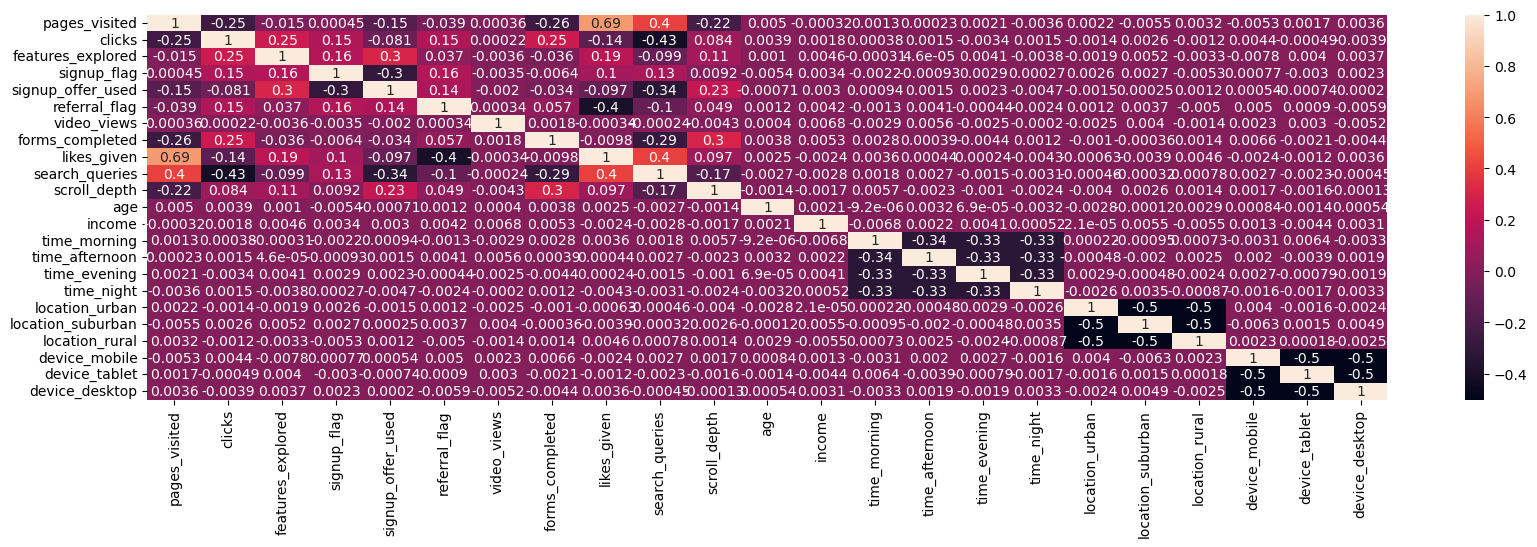

In [104]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(corr, annot=True, ax=ax)

In [105]:
corr_table = corr['signup_flag'].sort_values(ascending=False)

In [106]:
corr_table

signup_flag          1.000000
features_explored    0.164982
referral_flag        0.160968
clicks               0.146123
search_queries       0.134692
likes_given          0.103575
scroll_depth         0.009241
income               0.003358
time_evening         0.002917
location_suburban    0.002715
location_urban       0.002595
device_desktop       0.002266
device_mobile        0.000767
pages_visited        0.000445
time_night           0.000269
time_afternoon      -0.000926
time_morning        -0.002246
device_tablet       -0.003036
video_views         -0.003460
location_rural      -0.005315
age                 -0.005391
forms_completed     -0.006401
signup_offer_used   -0.298707
Name: signup_flag, dtype: float64

In [107]:
corr_abs_table = corr['signup_flag'].abs().sort_values(ascending=False)

In [108]:
corr_abs_table

signup_flag          1.000000
signup_offer_used    0.298707
features_explored    0.164982
referral_flag        0.160968
clicks               0.146123
search_queries       0.134692
likes_given          0.103575
scroll_depth         0.009241
forms_completed      0.006401
age                  0.005391
location_rural       0.005315
video_views          0.003460
income               0.003358
device_tablet        0.003036
time_evening         0.002917
location_suburban    0.002715
location_urban       0.002595
device_desktop       0.002266
time_morning         0.002246
time_afternoon       0.000926
device_mobile        0.000767
pages_visited        0.000445
time_night           0.000269
Name: signup_flag, dtype: float64

# 5. Model

train val test split

In [109]:
train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [110]:
X_train = train_df.drop(columns=['signup_flag'])
y_train = train_df['signup_flag']

X_val = val_df.drop(columns=['signup_flag'])
y_val = val_df['signup_flag']

X_test = test_df.drop(columns=['signup_flag'])
y_test = test_df['signup_flag']

In [111]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 22)
(60000,)
(20000, 22)
(20000,)
(20000, 22)
(20000,)


In [112]:
y_train.value_counts()

signup_flag
0    53770
1     6230
Name: count, dtype: int64

In [113]:
y_val.value_counts()

signup_flag
0    17965
1     2035
Name: count, dtype: int64

In [114]:
y_test.value_counts()

signup_flag
0    17904
1     2096
Name: count, dtype: int64

1. predicts only 1

In [115]:
dummy_all_churn = DummyClassifier(strategy='constant', constant=1)

In [116]:
dummy_all_churn.fit(X_train, y_train)

DummyClassifier(constant=1, strategy='constant')

2. predicts only 0

In [117]:
dummy_all_not_churn = DummyClassifier(strategy='constant', constant=0)

In [118]:
dummy_all_not_churn.fit(X_train, y_train)

DummyClassifier(constant=0, strategy='constant')

3. LGBM

In [119]:
lgbm_params = {
    'num_leaves': [31, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20, 30],
    'min_child_samples': [20, 50, 100],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [120]:
lgbm = LGBMClassifier(random_state=42)
lgbm_random_search = RandomizedSearchCV(lgbm, param_distributions=lgbm_params, n_iter=20, cv=3, random_state=42, scoring='roc_auc', n_jobs=-1)
lgbm_random_search.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6230, number of negative: 53770
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002938 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3080
[LightGBM] [Info] Number of data points in the train set: 60000, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.103833 -> initscore=-2.155339
[LightGBM] [Info] Start training from score -2.155339


RandomizedSearchCV(cv=3, estimator=LGBMClassifier(random_state=42), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [-1, 10, 20, 30],
                                        'min_child_samples': [20, 50, 100],
                                        'n_estimators': [100, 200, 300],
                                        'num_leaves': [31, 50, 100],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='roc_auc')

In [121]:
lgbm_random_search.best_score_

0.978712747446952

In [122]:
lgbm_best = lgbm_random_search.best_estimator_

# 6. Result

In [123]:
models = {
    'Dummy Model (All Register)': dummy_all_churn,
    'Dummy Model (All Not Register)': dummy_all_not_churn,
    'LightGBM': lgbm_best
}

In [124]:
summary_metrics = pd.DataFrame(columns=['Model', 'Observation', 'TP', 'TN', 'FP', 'FN', 'Precision', 'Recall', 'AUCROC'])

In [125]:
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    recall = tp / (tp + fn)
    precision = tp / (tp + fp)
    auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    model_summary = pd.DataFrame({
        'Model': [model_name],
        'Observation': [len(y_test)],
        'TP': [tp],
        'TN': [tn],
        'FP': [fp],
        'FN': [fn],
        'Precision': [precision],
        'Recall': [recall],
        'AUCROC': [auc_roc]
    })

    summary_metrics = pd.concat([summary_metrics, model_summary], ignore_index=True)

In [126]:
summary_metrics

,Model,Observation,TP,TN,FP,FN,Precision,Recall,AUCROC
0,Dummy Model (All Register),20000,2096,0,17904,0,0.104800,1.000000,0.500000
1,Dummy Model (All Not Register),20000,0,17904,0,2096,NaN,0.000000,0.500000
2,LightGBM,20000,1788,17793,111,308,0.941548,0.853053,0.977264


# 7. Threshold tunning

In [127]:
# Assume
# Cost of promotion = 100
# Cost of losing customer = 300 (3 times)

In [128]:
cost_promotion = 100
cost_loss = 300
savings_per_customer = 300

In [129]:
thresholds = np.linspace(0, 1, 101)  # 101 thresholds from 0 to 1

In [130]:
best_thresholds = {}
gains_val = {}
gains_test = {}

In [131]:
for model_name, model in models.items():

    model_gains_val = []
    model_gains_test = []

    y_pred_proba = model.predict_proba(X_val)[:, 1]
    if model_name == 'Dummy Model (All Churn)':
        y_pred_proba = y_pred_proba + 0.1
    elif model_name == 'Dummy Model (All Not Churn)':
        y_pred_proba = y_pred_proba - 0.1

    model_gains = []
    for threshold in thresholds:
        y_pred = (y_pred_proba > threshold).astype(int)
        cm = confusion_matrix(y_val, y_pred)
        costs = (cm[0, 1] * cost_promotion) + (cm[1, 0] * cost_loss)
        savings = cm[1, 1] * savings_per_customer
        gain = savings - costs
        model_gains.append(gain)

    best_threshold_idx = np.argmax(model_gains)
    best_threshold = thresholds[best_threshold_idx]
    
    best_thresholds[model_name] = (best_threshold, max(model_gains))
    gains_val[model_name] = model_gains
    
    y_test_pred_proba = model.predict_proba(X_test)[:, 1]
    if model_name == 'Dummy Model (All Churn)':
        y_test_pred_proba = y_test_pred_proba + 0.1
    elif model_name == 'Dummy Model (All Not Churn)':
        y_test_pred_proba = y_test_pred_proba - 0.1 

    y_test_pred = (y_test_pred_proba > best_threshold).astype(int)
    cm_test = confusion_matrix(y_test, y_test_pred)  
    costs_test = (cm_test[0, 1] * cost_promotion) + (cm_test[1, 0] * cost_loss)
    savings_test = cm_test[1, 1] * savings_per_customer   
    gain_test = savings_test - costs_test

    gains_test[model_name] = gain_test

In [132]:
best_thresholds

{'Dummy Model (All Register)': (1.0, -610500),
 'Dummy Model (All Not Register)': (0.0, -610500),
 'LightGBM': (0.14, 482700)}

In [133]:
gains_test

{'Dummy Model (All Register)': -628800,
 'Dummy Model (All Not Register)': -628800,
 'LightGBM': 504500}

In [134]:
summary_thresholds = pd.DataFrame(columns=['Model', 'Best Threshold', 'Validation Gain', 'Test Gain'])

In [135]:
for model_name, model_gains_val in gains_val.items():
    best_threshold, _ = best_thresholds[model_name]

    model_summary_thresholds = pd.DataFrame({
        'Model': [model_name],
        'Best Threshold': [best_threshold],
        'Validation Gain': [max(model_gains_val)],
        'Test Gain': [gains_test[model_name]]
    })

    summary_thresholds = pd.concat([summary_thresholds, model_summary_thresholds], ignore_index=True)

In [136]:
summary_thresholds

,Model,Best Threshold,Validation Gain,Test Gain
0,Dummy Model (All Register),1.00,-610500,-628800
1,Dummy Model (All Not Register),0.00,-610500,-628800
2,LightGBM,0.14,482700,504500


# 8. Result (threshold/cost)

In [137]:
summary_df = pd.merge(summary_metrics, summary_thresholds, on="Model", how="left")

In [138]:
summary_df

,Model,Observation,TP,TN,FP,FN,Precision,Recall,AUCROC,Best Threshold,Validation Gain,Test Gain
0,Dummy Model (All Register),20000,2096,0,17904,0,0.104800,1.000000,0.500000,1.00,-610500,-628800
1,Dummy Model (All Not Register),20000,0,17904,0,2096,NaN,0.000000,0.500000,0.00,-610500,-628800
2,LightGBM,20000,1788,17793,111,308,0.941548,0.853053,0.977264,0.14,482700,504500
